## 1️ Paradoxe d’Achille et la tortue

## 2️ Paradoxe de la dichotomie

## 3️ Paradoxe de la flèche en vol

### 2500 ans de casse-tête
Le philosophe grec Zénon affirmait : "À chaque instant, la flèche occupe un espace égal à elle-même, donc elle est au repos à chaque instant, donc toujours au repos." Comment quelque chose peut-il bouger si elle est immobile à chaque instant ?


In [34]:
### Paramètres de l'observation
# Durée totale de la simulation en seconde
temps_total = 2  
# Vitesse (m/s)
v = 5
# Distance totale à parcourir
distance = 10
# Durée totale de la simulation en secondes
temps_total = 2  
# Pas de temps / Intervalle de temps
dt = 0.01

print(f"Vitesse: {v} m/s, Distance cible: {distance} m, Pas de temps: {dt} s")
print()

## Initialisation de l'observation
# Temps initial / début de l'observation
t = 0
# Position initiale
x = 0
# Distance parcourue
dist_parcourue = 0
# Compteur d'étapes
step = 0

print(f"Début: t={round(t,2)}s → position={round(x,2)}m")

while x < distance :
    parcouru_pendant_dt = dt * v
    x = x + parcouru_pendant_dt
    t += dt
    step += 1
    print(f"Étape {step}: t={round(t,3)} → position={round(x,2)}m (+{round(parcouru_pendant_dt,2)}m)")

print()
print(f"✓ Objectif atteint en {step} étapes - Position finale: {round(x,4)} m")

Vitesse: 5 m/s, Distance cible: 10 m, Pas de temps: 0.01 s

Début: t=0s → position=0m
Étape 1: t=0.01 → position=0.05m (+0.05m)
Étape 2: t=0.02 → position=0.1m (+0.05m)
Étape 3: t=0.03 → position=0.15m (+0.05m)
Étape 4: t=0.04 → position=0.2m (+0.05m)
Étape 5: t=0.05 → position=0.25m (+0.05m)
Étape 6: t=0.06 → position=0.3m (+0.05m)
Étape 7: t=0.07 → position=0.35m (+0.05m)
Étape 8: t=0.08 → position=0.4m (+0.05m)
Étape 9: t=0.09 → position=0.45m (+0.05m)
Étape 10: t=0.1 → position=0.5m (+0.05m)
Étape 11: t=0.11 → position=0.55m (+0.05m)
Étape 12: t=0.12 → position=0.6m (+0.05m)
Étape 13: t=0.13 → position=0.65m (+0.05m)
Étape 14: t=0.14 → position=0.7m (+0.05m)
Étape 15: t=0.15 → position=0.75m (+0.05m)
Étape 16: t=0.16 → position=0.8m (+0.05m)
Étape 17: t=0.17 → position=0.85m (+0.05m)
Étape 18: t=0.18 → position=0.9m (+0.05m)
Étape 19: t=0.19 → position=0.95m (+0.05m)
Étape 20: t=0.2 → position=1.0m (+0.05m)
Étape 21: t=0.21 → position=1.05m (+0.05m)
Étape 22: t=0.22 → position=1.1m

## Visualisation

### Commençons par un vraie flèche

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


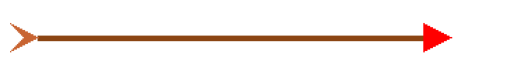

In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt

pygame.init()
w, h = 360, 40
surf = pygame.Surface((w, h))

def draw_arrow():
    surf.fill((255, 255, 255))
    cx, cy = w // 2, h // 2
    start, end = 20, w - 60  # marge pour pointe et plumes

    # Corps de la flèche
    pygame.draw.line(surf, (139, 69, 19), (start, cy), (end, cy), 4)

    # Pointe
    pygame.draw.polygon(surf, (255,0,0), [(end + 20, cy), (end, cy - 10), (end, cy + 10)])

    # Plumes
    pygame.draw.polygon(surf, (200, 100, 50), [(start, cy), (start - 20, cy - 10), (start - 10, cy)])
    pygame.draw.polygon(surf, (200, 100, 50), [(start, cy), (start - 20, cy + 10), (start - 10, cy)])
    
    # Affichage
    img = np.transpose(pygame.surfarray.array3d(surf), (1, 0, 2))
    plt.imshow(img); plt.axis("off"); plt.show()

draw_arrow()

### Zenon prétend que ceci est une illusion

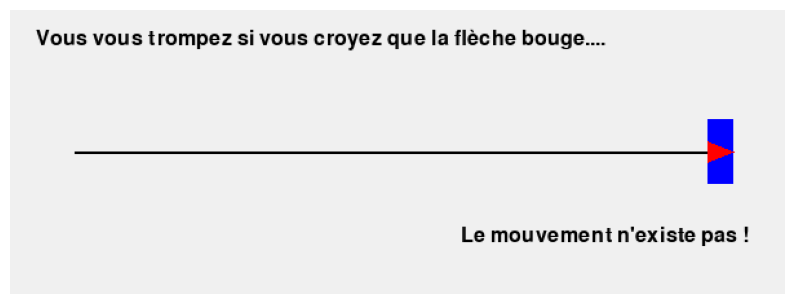

In [30]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Initialiser pygame
pygame.init()

# Paramètres
v = 100
distance = 10
dt = 0.002
width, height = 600, 220  # Agrandi la hauteur
start_x, end_x = 50, width-50  # centre de la cible
line_y = height // 2  # Descendu l'animation
target_w, target_h = 20, 50    # cible élargie pour bien contenir la flèche
triangle_w = 20                # largeur du triangle
triangle_h = 16                # hauteur du triangle

surface = pygame.Surface((width, height))
x = 0

while x / distance < 1.0:
    x_progress = min(x / distance, 1.0)
    
    # Position de la pointe (tip)
    arrow_tip_x = start_x + x_progress * (end_x - start_x)
    
    # Effacer surface
    surface.fill((240, 240, 240))
    
    # Ajouter le titre en haut à gauche dès le début (taille réduite)
    title_font = pygame.font.SysFont(None, 24)  # Taille réduite
    left_title_text = title_font.render("Vous vous trompez si vous croyez que la flèche bouge.", True, (0, 0, 0))
    left_title_rect = left_title_text.get_rect(topleft=(20, 15))
    surface.blit(left_title_text, left_title_rect)
    
    # Ligne et cible bleue
    pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
    pygame.draw.rect(surface, (0, 0, 255), 
                     (end_x - target_w//2, line_y - target_h//2, target_w, target_h))
    
    # Triangle rouge
    pygame.draw.polygon(
        surface,
        (255, 0, 0),
        [(int(arrow_tip_x), line_y),
         (int(arrow_tip_x) - triangle_w, line_y - triangle_h//2),
         (int(arrow_tip_x) - triangle_w, line_y + triangle_h//2)]
    )
    
    # Afficher dans le notebook
    img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
    clear_output(wait=True)
    plt.figure(figsize=(10,4))  # Agrandi la hauteur de la figure
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Avancer
    x += v * dt
    time.sleep(dt)

# Dernière frame : triangle entièrement dans la cible
arrow_tip_x = end_x + target_w//2  # décaler jusqu'au bord droit de la cible
surface.fill((240, 240, 240))

# Ajouter le titre en haut à gauche (taille réduite)
title_font = pygame.font.SysFont(None, 24)  # Taille réduite
left_title_text = title_font.render("Vous vous trompez si vous croyez que la flèche bouge....", True, (0, 0, 0))
left_title_rect = left_title_text.get_rect(topleft=(20, 15))
surface.blit(left_title_text, left_title_rect)

# Ligne et cible bleue
pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
pygame.draw.rect(surface, (0, 0, 255), 
                 (end_x - target_w//2, line_y - target_h//2, target_w, target_h))
pygame.draw.polygon(
    surface,
    (255, 0, 0),
    [(int(arrow_tip_x), line_y),
     (int(arrow_tip_x) - triangle_w, line_y - triangle_h//2),
     (int(arrow_tip_x) - triangle_w, line_y + triangle_h//2)]
)

# Ajouter le titre principal décalé vers la droite (taille réduite)
title_text = title_font.render("Le mouvement n'existe pas !", True, (0, 0, 0))
title_rect = title_text.get_rect(center=(width//2 + 160, line_y + target_h//2 + 40))  # Décalé vers la droite
surface.blit(title_text, title_rect)

img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
clear_output(wait=True)
plt.figure(figsize=(10,4))  # Agrandi la hauteur de la figure
plt.imshow(img)
plt.axis('off')
plt.show()

### La vision de Zenon

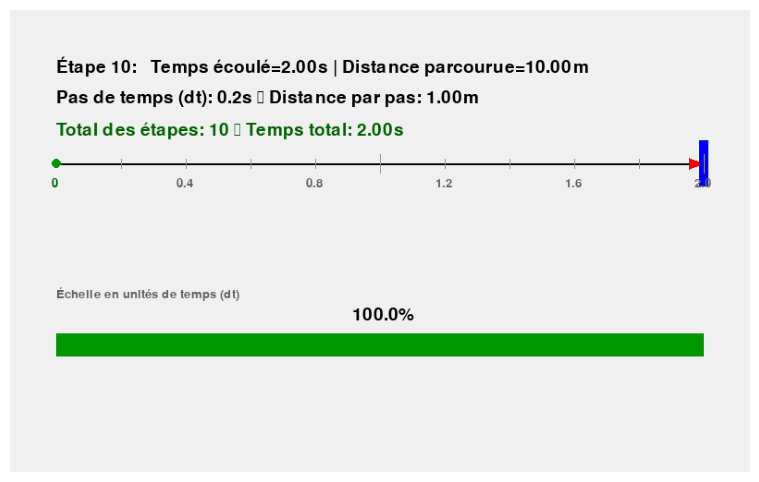

✓ Objectif atteint en 10 étapes - Position finale: 10.0 m
Temps total: 2.00s - Vitesse moyenne: 5.00m/s


In [32]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Initialiser pygame
pygame.init()

# Paramètres
v = 5
distance = 10
dt = 0.2
width, height = 800, 500
surface = pygame.Surface((width, height))

# Initialisation
t = 0
x = 0
step = 0

# Polices
font = pygame.font.SysFont(None, 28)
small_font = pygame.font.SysFont(None, 20)
target_x = width - 50

def draw_frame(x_progress, t, step):
    surface.fill((240, 240, 240))
    
    start_x, end_x = 50, width-50
    line_y = height//3
    
    # Ligne de trajectoire et position initiale
    pygame.draw.line(surface, (0, 0, 0), (start_x, line_y), (end_x, line_y), 2)
    pygame.draw.circle(surface, (0, 150, 0), (start_x, line_y), 5)
    surface.blit(small_font.render("0", True, (0, 100, 0)), (start_x-5, line_y+15))
    
    # Flèche rouge (triangle à la place du cercle)
    arrow_x = start_x + (x_progress * (end_x-start_x))
    triangle_w, triangle_h = 16, 12  # largeur et hauteur de la pointe
    pygame.draw.polygon(
        surface,
        (255, 0, 0),
        [(int(arrow_x), line_y),  # pointe avant
         (int(arrow_x - triangle_w), line_y - triangle_h//2),
         (int(arrow_x - triangle_w), line_y + triangle_h//2)]
    )
    
    # Cible
    pygame.draw.rect(surface, (0, 0, 255), (int(target_x)-5, line_y-25, 10, 50))
    
    # Échelle en dt
    segment_length = (dt * v / distance) * (end_x-start_x)
    total_segments = int(distance / (dt * v))
    for i in range(1, total_segments + 1):
        mark_x = start_x + i * segment_length
        if mark_x > end_x: break
        mark_height = 10 if i % 5 == 0 else 5
        pygame.draw.line(surface, (150, 150, 150), 
                         (int(mark_x), line_y-mark_height), 
                         (int(mark_x), line_y+mark_height), 1)
        if i % max(1,int(0.5/dt)) == 0:
            surface.blit(small_font.render(f"{i*dt:.1f}", True, (100,100,100)), (int(mark_x)-10, line_y+15))
    
    # Texte info
    surface.blit(font.render(f"Étape {step}:   Temps écoulé={t:.2f}s | Distance parcourue={x_progress*distance:.2f}m", True, (0,0,0)), (50,50))
    surface.blit(font.render(f"Pas de temps (dt): {dt}s → Distance par pas: {dt*v:.2f}m", True, (0,0,0)), (50,85))
    if x_progress >= 1.0:
        surface.blit(font.render(f"Total des étapes: {step} → Temps total: {t:.2f}s", True, (0,100,0)), (50,120))
    
    # Barre de progression
    bar_y = height - 150
    bar_height = 25
    pygame.draw.rect(surface, (200, 200, 200), (50, bar_y, width-100, bar_height))
    pygame.draw.rect(surface, (0, 150, 0), (50, bar_y, int((width-100) * x_progress), bar_height))
    
    # Pourcentage
    surface.blit(font.render(f"{x_progress*100:.1f}%", True, (0,0,0)), (width//2-30, bar_y-30))
    surface.blit(small_font.render("Échelle en unités de temps (dt)", True, (100,100,100)), (50, bar_y-50))
    
    # Affichage matplotlib
    img = np.transpose(pygame.surfarray.array3d(surface), (1,0,2))
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Affichage initial
draw_frame(0, t, step)
print(f"Début: t={round(t,2)}s → position={round(x,2)}m")

# Simulation
while x < distance:
    time.sleep(0.8)
    x_progress = min(x / distance, 1.0)
    draw_frame(x_progress, t, step)
    print(f"Étape {step}:   Temps écoulé ={round(t,3)} → position={round(x,2)}m (+{round(dt*v,2)}m)")
    x += dt*v; t += dt; step += 1
    clear_output(wait=True)

draw_frame(1.0, t, step)
print(f"✓ Objectif atteint en {step} étapes - Position finale: {round(x,4)} m")
print(f"Temps total: {t:.2f}s - Vitesse moyenne: {distance/t:.2f}m/s")

## Conclusion : Le paradoxe de Zénon démasqué

### Notre simulation révèle la faille

Cette simulation révèle la faille logique du paradoxe de la flèche. En modélisant le mouvement avec différentes valeurs de dt, nous reproduisons - et résolvons - un piège similaire à celui de l'enfumeur antique grec :

### La "tricherie" moderne
Dans nos calculs numériques, nous pourrions tomber dans le même piège :
1. **Pour calculer le mouvement** : nous utilisons `dt = 0.1s` et calculons `distance = vitesse × dt = 5 × 0.1 = 0.5m`
2. **Pour "observer" le résultat** : nous regardons la position à l'instant t=0.1s et disons "regardez, elle est immobile à cette position !"
3. **La conclusion fallacieuse** : "Donc elle ne bouge jamais !"

### L'analogie révélatrice
C'est comme dire :
> *"Pendant cette heure, la voiture a roulé à 100 km/h"* (on utilise un intervalle pour définir le mouvement)
> 
> *"Maintenant, à cet instant précis, elle est immobile au kilomètre 100"* (on nie le mouvement à l'instant)
> 
> *"Donc la voiture ne s'est jamais déplacée !"*

### La réponse décisive : le mouvement persiste toujours

Notre simulation révèle la vérité fondamentale que Zénon ne pouvait pas voir :

**Aussi petit que soit dt, la flèche continue de se déplacer pendant cet intervalle.**
- Avec dt = 1s → elle parcourt 5m
- Avec dt = 0.1s → elle parcourt 0.5m  
- Avec dt = 0.001s → elle parcourt 0.005m
- Même avec dt infinitésimal → le mouvement persiste !

### Le verdict moderne

Le mouvement ne "disparaît" jamais, même à l'échelle de l'instant. Ce que les mathématiques modernes appellent la "vitesse instantanée" n'est pas l'absence de mouvement, mais le mouvement à cet instant précis.

**Zénon confondait "instant infiniment bref" avec "absence de mouvement".** Notre simulation montre que le mouvement est robuste : il survit à toutes les échelles de temps, du pas grossier de 1 seconde jusqu'à l'infinitésimal.

## Zénon et la Physique Quantique : une étonnante résonance

### Ce qui donne raison à Zénon (en apparence)

**1. Le Paradoxe Quantique de Zénon (Quantum Zeno Effect)**  
C'est un effet réel et observable : si on observe continuellement une particule quantique, on l'empêche d'évoluer !  

- *Analogie* : Comme une flèche qui ne bouge pas si on la regarde trop souvent  
- *Principe* : Une mesure quantique "réinitialise" l'évolution temporelle  
- *Expérience réelle* : Des atomes peuvent être "gelés" dans un état par des mesures répétées  

**2. Nature Discrète et Granulaire**  
La physique quantique suggère que l'espace-temps pourrait être discret à l'échelle de Planck :  
- *Comme si l'Univers avait un "dt minimum"*

### Ce qui donne tord à Zénon (fondamentalement)

**1. Ce n'est pas du tout le même "instant"**  
- **Zénon** : Instant mathématique idéalisé (dt = 0)  
- **Quantique** : Intervalle de temps très court mais non nul (dt > 0)  

**2. Le mouvement n'est pas nié, il est modifié**  
L'effet Zénon quantique ne prouve pas que le mouvement n'existe pas, mais montre que l'observation affecte le système observé.  

**3. Superpositions et Probabilités**  
En quantique, une particule n'a pas de position précise entre les mesures - elle existe dans une superposition de positions possibles.

### En quelques mots

- **Zénon avait tort** : le mouvement existe bel et bien  
- **Mais il avait une intuition** : trop regarder quelque chose change son comportement  
- **La quantique le confirme** : regarder trop souvent une particule l'empêche d'évoluer  

*C'est comme si Zénon avait fait une mauvaise addition... mais était tombé par hasard sur le bon résultat !*